In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('../makemore/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [6]:
# building the vocab of characters, and mappings to/from integers
chars = sorted(list(set(''.join(words))))

stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [13]:
# building the dataset

block_size = 3
X,Y = [],[]

for w in words[:5]:
    print(w)
    context = [0] * block_size # initialize the context
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ----> e
..e ----> m
.em ----> m
emm ----> a
mma ----> .
olivia
... ----> o
..o ----> l
.ol ----> i
oli ----> v
liv ----> i
ivi ----> a
via ----> .
ava
... ----> a
..a ----> v
.av ----> a
ava ----> .
isabella
... ----> i
..i ----> s
.is ----> a
isa ----> b
sab ----> e
abe ----> l
bel ----> l
ell ----> a
lla ----> .
sophia
... ----> s
..s ----> o
.so ----> p
sop ----> h
oph ----> i
phi ----> a
hia ----> .


In [44]:
# building the dataset

block_size = 3
X,Y = [],[]

for w in words:
#     print(w)
    context = [0] * block_size # initialize the context
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
#         print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

In [45]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [116]:
g = torch.Generator().manual_seed(2147483647)

C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn((100), generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn((27), generator=g)
parameters = [C,W1,b1,W2,b2]

In [117]:
sum(p.nelement() for p in parameters)

3481

In [118]:
for p in parameters:
    p.requires_grad = True

In [119]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [156]:
# lri = []
# lossi = []

for i in range(10000):
    # mini-batch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    # forward pass
    emb = C[X[ix]] # (32,3,2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(X.shape[0]),Y].log().mean()
    loss = F.cross_entropy(logits, Y[ix])
#     print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
#     lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad
        
#     # track stats
#     lri.append(lre[i])
#     lossi.append(loss.item())
# print(f'{loss = }')

In [157]:
# plt.plot(lri, lossi)

In [158]:
emb = C[X] # (32,3,2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss.item()

2.2985568046569824

## Train/dev/test splits

In [159]:

def build_dataset(words):
    # building the dataset

    block_size = 3
    X,Y = [],[]

    for w in words:
    #     print(w)
        context = [0] * block_size # initialize the context
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
    #         print(''.join(itos[i] for i in context), '---->', itos[ix])
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr,Ytr = build_dataset(words[:n1])
Xdev,Ydev = build_dataset(words[n1:n2])
Xte,Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [255]:
g = torch.Generator().manual_seed(2147483647)

C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 300), generator=g)
b1 = torch.randn((300), generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn((27), generator=g)
parameters = [C,W1,b1,W2,b2]

In [256]:
sum(p.nelement() for p in parameters)

17697

In [257]:
for p in parameters:
    p.requires_grad = True

In [258]:
# lre = torch.linspace(-3, 0, 1000)
# lrs = 10**lre

In [259]:
lri = []
lossi = []
stepi = []

for i in range(200000):
    # mini-batch construct
    ix = torch.randint(0, Xtr.shape[0], (64,))
    
    # forward pass
    emb = C[Xtr[ix]] # (32,3,2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(X.shape[0]),Y].log().mean()
    loss = F.cross_entropy(logits, Ytr[ix])
#     print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
#     lr = lrs[i]
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
        
    # track stats
#     lri.append(lre[i])
    lossi.append(loss.log10().item())
    stepi.append(i)
print(f'{loss = }')

loss = tensor(2.1961, grad_fn=<NllLossBackward0>)


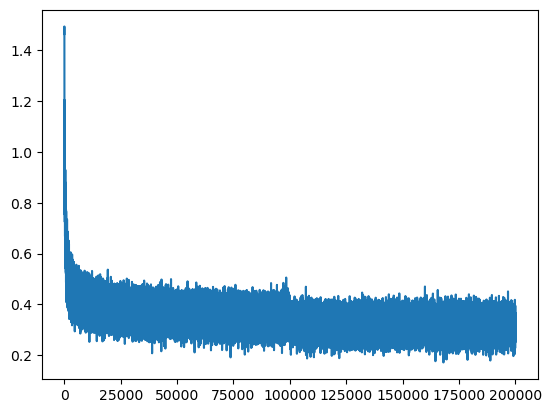

In [260]:
plt.plot(stepi, lossi)

In [261]:
emb = C[Xtr] # (32,3,2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.09977650642395

In [262]:
emb = C[Xdev] # (32,3,2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.164210557937622

## Visualizing embedding vectors

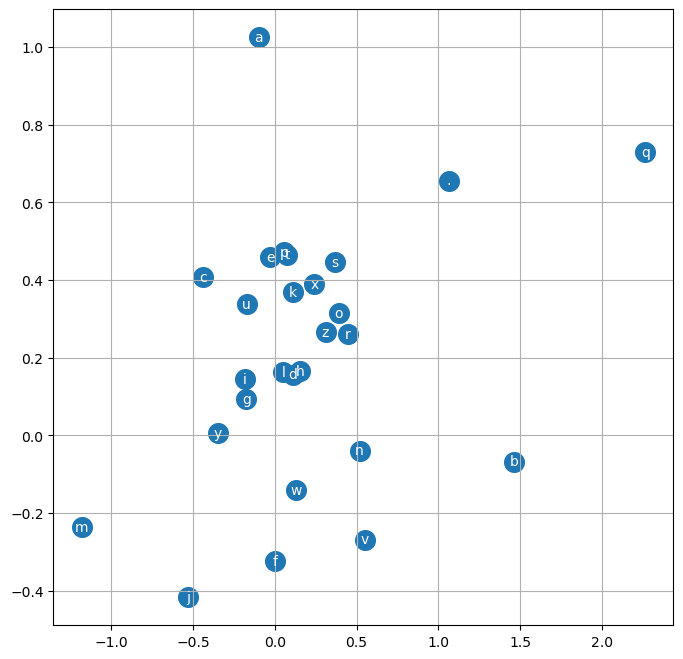

In [263]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid()

## Sample from the model

In [270]:
for _ in range(20):
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

ariya.
hon.
jola.
lou.
maxim.
mick.
ace.
arch.
timory.
noelan.
kheim.
avewoodali.
joshkandwanco.
wella.
amramorahumahidatebel.
saava.
mabellias.
ane.
sammy.
blemmerena.
